Case Study:
Using Logistic Regression, predict whether a house will be located in NY or SF.  
First I have used train_test_split to split the data into 20% testing data and 80% training data.
Then I did some exploratory data analysis to find the single best feature that splits up the two different classes the most. 
Logistic Regression, by default, uses a hard classifier to separate the two classes. Based on the feature I selected, I am  trying to find the value that separates the classes?

Behind the scenes logistic regression produces probabilities, and choses the most likely one as “the” prediction. Using the .predict_proba() method for your model to see that the cutoff from your model is indeed the 50% threshold for probability.
Plot the confusion matrix. Determining where my model is getting wrong?
Then trying to use 2 features from the dataset to create a model to determine if the model works better with only one feature or two. Using cross-validation to add a 3rd feature to the model to analyse which model is working as the best.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.patches as patches
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
NY_SF_df= pd.read_csv("ny_sf_apt.csv")

#### Checking for null values in the data

In [3]:
NY_SF_df.isna().sum()

in_sf             0
beds              0
bath              0
price             0
year_built        0
sqft              0
price_per_sqft    0
elevation         0
dtype: int64

In [4]:
NY_SF_df.head()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


In [5]:
sns.set_context("talk")
sns.set_style("whitegrid", {'grid.color': '.92'})

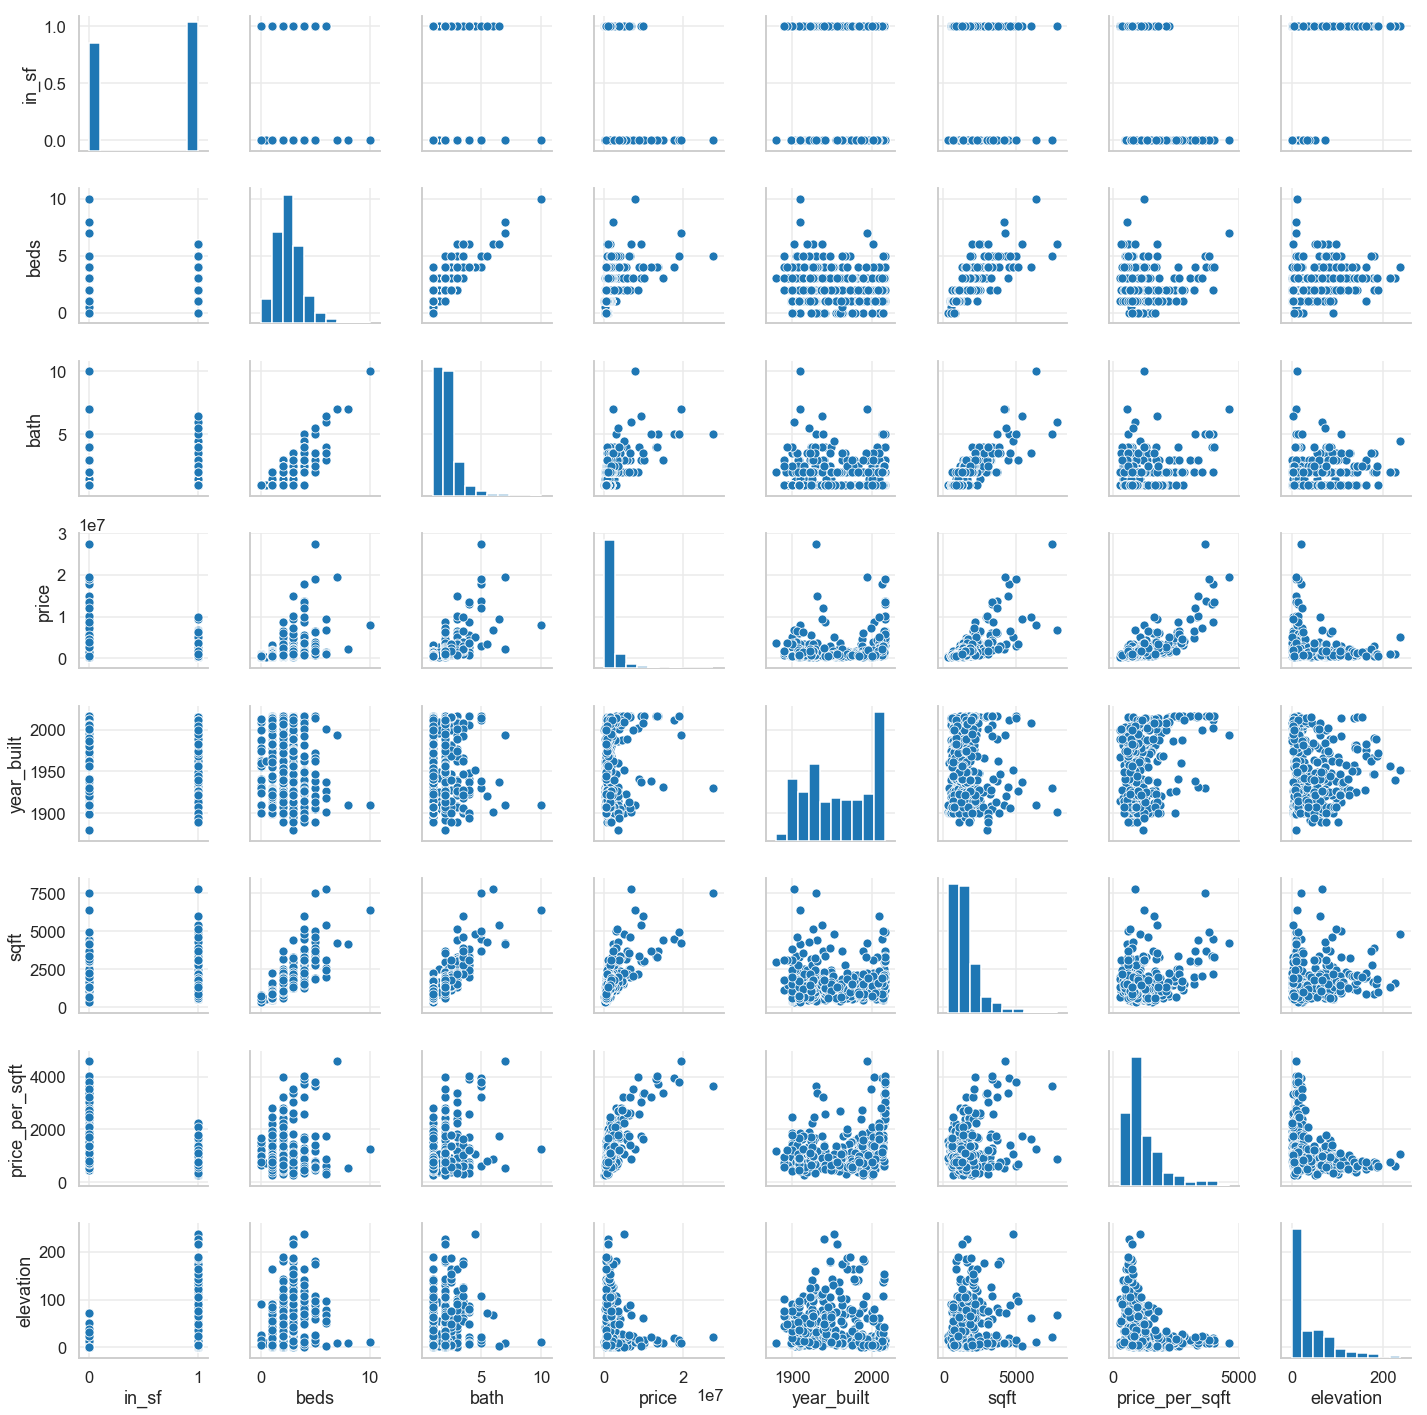

In [6]:
sns.pairplot(NY_SF_df)

### I am trying to plot scatterplot between 'in_sf' and different fields to check which feature will split up the two different classes the most.

#### in_sf vs elevation

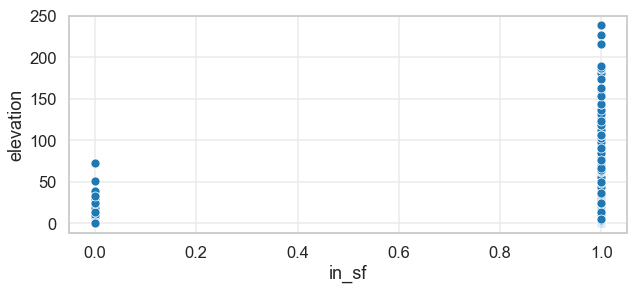

In [7]:
plt.figure(figsize=(10, 4))

sns.scatterplot(x=NY_SF_df['in_sf'],y=NY_SF_df['elevation'])

#### in_sf vs price_per_sqft

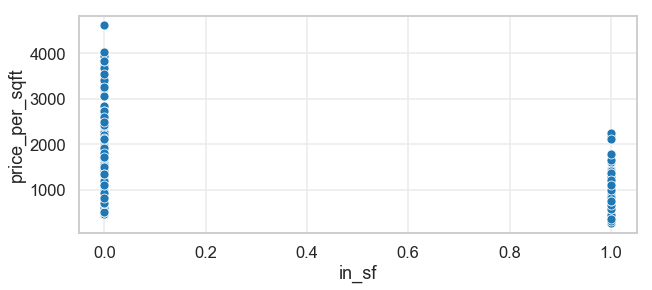

In [8]:
plt.figure(figsize=(10, 4))

sns.scatterplot(x=NY_SF_df['in_sf'],y=NY_SF_df['price_per_sqft'])

#### in_sf vs price

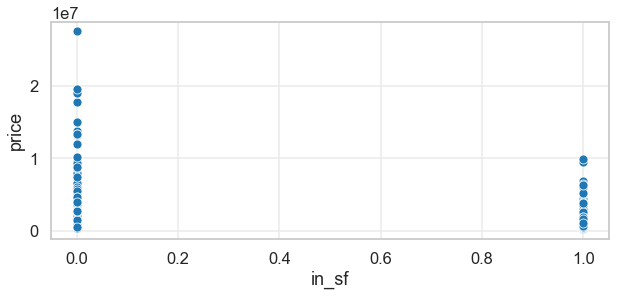

In [9]:
plt.figure(figsize=(10, 4))

sns.scatterplot(x=NY_SF_df['in_sf'],y=NY_SF_df['price'])

#### in_sf vs year_built

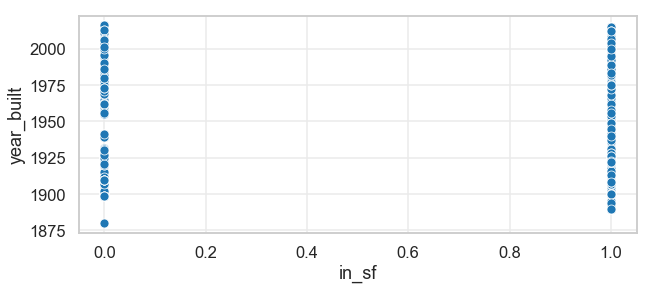

In [10]:
plt.figure(figsize=(10, 4))

sns.scatterplot(x=NY_SF_df['in_sf'],y=NY_SF_df['year_built'])

#### in_sf vs sqft

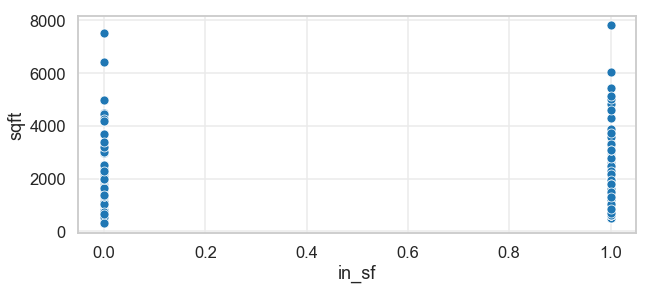

In [11]:
plt.figure(figsize=(10, 4))

sns.scatterplot(x=NY_SF_df['in_sf'],y=NY_SF_df['sqft'])

#### in_sf vs bath

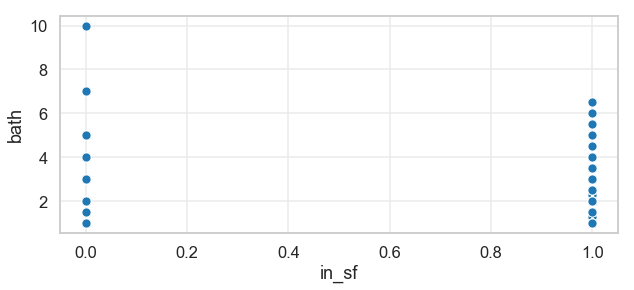

In [12]:
plt.figure(figsize=(10, 4))

sns.scatterplot(x=NY_SF_df['in_sf'],y=NY_SF_df['bath'])

#### in_sf vs beds

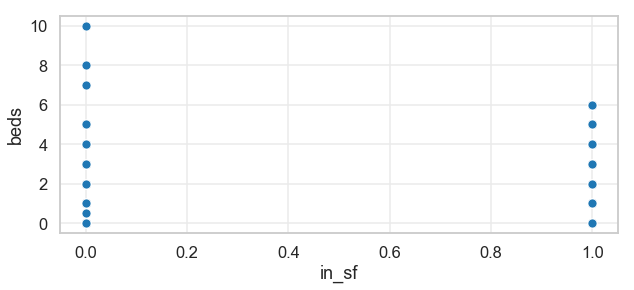

In [13]:
plt.figure(figsize=(10, 4))

sns.scatterplot(x=NY_SF_df['in_sf'],y=NY_SF_df['beds'])

#### There are three features which can be analysed for splitting - 'elevation', 'price_per_sqft','price' to check the split between two classes but I found that Elevation is the one which splits up two different classes the most. Though NY and SF is getting overlapped at the lower elevation but we can say that elevation of 40 divides the data into 2 parts - i.e if elevation >40 chances are high that it belongs to SF.

Logistic Regression Model <b>Referring Professor's lecture notes on Classification </b>

*** Using train_test_split to split the data into 20% testing data and 80% training data***

Since Logistic regression uses regularization by default and regularization works best when we standardize our features, so standardizing the features.

In [14]:
scaled_features = NY_SF_df.copy()
col_names = ['beds', 'bath', 'price', 'year_built', 'sqft', 'price_per_sqft', 'elevation']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
X = scaled_features.drop('in_sf',axis=1)
y = scaled_features['in_sf']
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(393, 7) (393,)
(99, 7) (99,)


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Checking the distribution of elevation

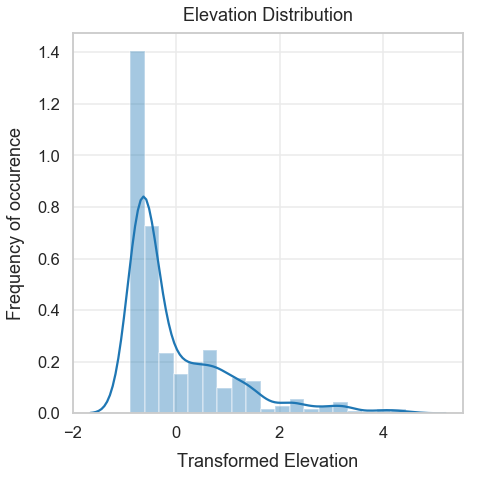

In [15]:
plt.figure(figsize=(7, 7))
X_elevation = X_train['elevation'].values.reshape(-1, 1)
sns.distplot(X_elevation)
plt.title("Elevation Distribution", y=1.015)
plt.xlabel("Transformed Elevation", labelpad=12)
plt.ylabel("Frequency of occurence", labelpad=12);

In [16]:
log_reg = LogisticRegression() #Logistic Regression Model

In [17]:
log_reg.fit(X_elevation, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Use the .predict_proba() method for your model to see that the cutoff from your model is indeed the 50% threshold for probability. Plot the confusion matrix .

This gives the probability of observations belong to class 0 and class 1. The first item in the list is the probability that this observation belongs to class 0, and the second list item is the probability that this observation belongs to class 1.

In [18]:
log_reg.predict_proba(X_elevation)[0]

array([0.0546543, 0.9453457])

In [19]:
X_train_probability_class_1 = log_reg.predict_proba(X_elevation)[:, 1]

In [20]:
X_train_probability_class_1[0]

0.9453456954413201

I am plotting the data now by putting our X_train observations and X_train_probability_class_1 predictions as two columns

In [21]:
predictions = {"x_training_points": X_elevation.flatten(),
                 "x_train_proba_being_class_1": X_train_probability_class_1}
df_predictions = pd.DataFrame(predictions)

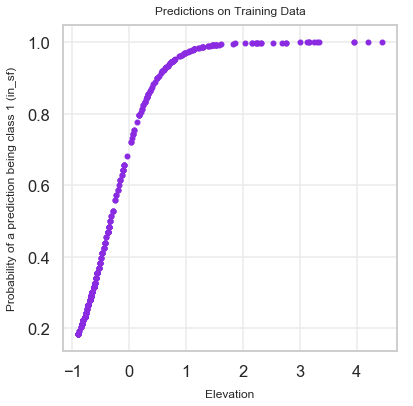

In [22]:
ax = df_predictions.plot.scatter(x="x_training_points", y="x_train_proba_being_class_1", figsize=(6, 6),
                                 c='blueviolet')
plt.title("Predictions on Training Data", y=1.015, fontsize=12)
plt.xlabel("Elevation", labelpad=10,fontsize=12)
plt.ylabel("Probability of a prediction being class 1 (in_sf)", labelpad=10,fontsize=12);

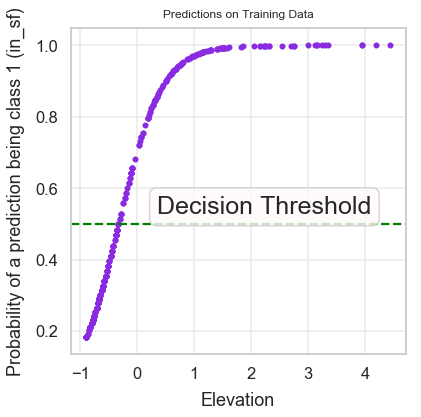

In [23]:
ax = df_predictions.plot.scatter(x="x_training_points", y="x_train_proba_being_class_1", 
                                 figsize=(6, 6), c='blueviolet')
plt.title("Predictions on Training Data", y=1.015, fontsize=12)
plt.xlabel("Elevation", labelpad=10)
plt.ylabel("Probability of a prediction being class 1 (in_sf)", labelpad=10)
plt.axhline(y=0.5, linestyle="--", color='green')
bbox_props_decision_threshold = dict(boxstyle="round", fc="snow", ec="0.8", alpha=0.8)
ax.text(0.35, 0.53, "Decision Threshold", bbox=bbox_props_decision_threshold, size=25);

#### Checking for Accuracy 

In [24]:
X_test1 = X_test['elevation'].values.reshape(-1, 1)

In [25]:
accuracy_test_set = log_reg.score(X_test1, y_test)

In [26]:
accuracy_test_set

0.7878787878787878

In [27]:
y_test_predictions = log_reg.predict(X_test1)

In [28]:
Counter(y_test_predictions)

Counter({0: 54, 1: 45})

The accuracy for our model is <b> 78.78% </b> using a single feature - elevation.

Let's get the predicted probabilities on our test set that observations belong to the SF class. We can use the predict_proba method. This returns the probablities that this observation is of class NY or SF. See below.

In [29]:
log_reg.predict_proba(X_test1)[0]

array([0.71031159, 0.28968841])

We want to be able to index the 1st value (which comes after the 0th value) for each of those arrays. We do that in the code below.

In [30]:
y_test_probability_predictions = log_reg.predict_proba(X_test1)[:, 1]

In [31]:
y_test_probability_predictions[0:3]

array([0.28968841, 0.25438767, 0.8886718 ])

In [32]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_test_probability_predictions)

***Calculating the optimal Threshold cut-off point***

In [33]:
optimal_idx = np.argmax(true_positive_rate - false_positive_rate)
optimal_threshold = threshold[optimal_idx]
print(optimal_threshold)

0.7205257498221518


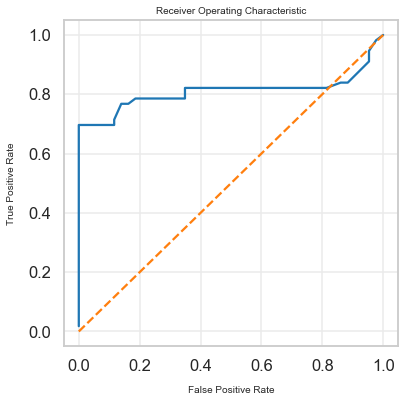

In [34]:
plt.figure(figsize=(6, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.title('Receiver Operating Characteristic',fontsize=10)
plt.ylabel('True Positive Rate', labelpad=12, fontsize=10)
plt.xlabel('False Positive Rate', labelpad=12,fontsize=10);

When there is no difference between the two distributions, the area under ROC curve will be equal to 0.5 (the ROC curve will coincide with the diagonal). 
When there is a perfect separation of the values of the two groups, i.e. there no overlapping of the distributions, the area under the ROC curve equals 1 (the ROC curve will reach the upper left corner of the plot).
But here, since there is overlapping of data at lower elevation between NY and SF so the ROC curve is near to 0.7.

#### Plotting the confusion matrix

In [35]:
class_names = ["NY", "SF"]

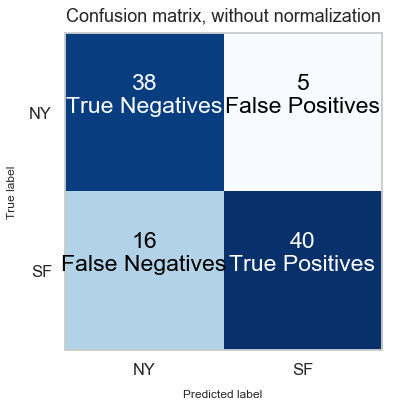

In [36]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    name = None    
    fmt = 'd'
    thresh = cm.max() / 2
    # i and j tell us the coordinates of boxes
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if i == 0 and j == 0:
            name = "True Negatives"
        elif i == 0 and j == 1:
            name = "False Positives"
        elif i == 1 and j == 1:
            name = "True Positives"
        else:
            name = "False Negatives"
        plt.text(j, i, format(cm[i, j], fmt) + "\n" + name, horizontalalignment="center", 
                 fontsize=23, color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', labelpad=12,fontsize=12)
    plt.xlabel('Predicted label', labelpad=12,fontsize=12)
    plt.title(title, y=1.02)
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_predictions);
np.set_printoptions(precision=2);

# Plot non-normalized confusion matrix
plt.figure(figsize=(6, 6))
plt.grid(False)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

Out of 99 predictions:
<ul>The model predicted 40 Houses in San Francisco, and the houses were actually in SF <b> True Positive case </b></ul>
<ul>The model predicted 38 houses in New York and the houses were actually in New York <b> True Negative case </b></ul>
<ul>The model predicted 16 houses in New York but they were actually in San Francisco <b> False Negative case </b></ul>
<ul>The model predicted 5 houses in San Francisco but they were actually in New York <b> False Positives case </b></ul>
<ul>Comment: Our Model is predicting 21 incorrect predictions out of 99 predictions.</ul>

Accuracy: is the proportion of correct predictions. 
(TP+TN)/Total = (40+38)/99 = 78.78% 
Misclassification Rate: Overall, how often is it wrong? (FP+FN)/total = (16+5)/99 = 21.21% 
Precision: When it predicts yes, how often is it correct? TP/predicted yes = 40/45 = 88.89%

Lets calculate the precision score for our model which is given by:
Precision = True Positives / (True Positives + False Positives) = 40/(40+5)

In [37]:
print("Precision: {0}".format(precision_score(y_test, y_test_predictions)))

Precision: 0.8888888888888888


<b>Now use 2 features from your dataset to create a model. Does it perform better or worse than your model with only one feature? Use cross-validation to add a 3rd feature to your model. Which feature performs best on the validation set?<b>

Based on various scatterplot I plotted initially, I could determine that top 3 features for splitting the data were:
<li>Elevation, price_per_sqft and price</li>
So, using price_per_sqft as second feature here.

In [38]:
X_2_columns = X_train[['price_per_sqft', 'elevation']]

In [39]:
log_reg = LogisticRegression()

In [40]:
log_reg.fit(X_2_columns, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
log_reg.predict_proba(X_2_columns)[0]

array([0.07, 0.93])

In [42]:
X_train_probability_class_1 = log_reg.predict_proba(X_2_columns)[:, 1]

In [43]:
X_train_probability_class_1[0]

0.9321551648607117

In [44]:
log_reg.coef_

array([[-1.43,  2.17]])

In [45]:
log_reg.intercept_

array([0.69])

In [46]:
X_test_new = X_test[['price_per_sqft', 'elevation']]

In [47]:
accuracy_test_set = log_reg.score(X_test_new, y_test)

In [48]:
accuracy_test_set

0.797979797979798

In [49]:
y_test_predictions = log_reg.predict(X_test_new)

In [50]:
Counter(y_test_predictions)

Counter({0: 39, 1: 60})

#### <i>Here, after adding two features I could see that the model has improved by a minute amount. This may be because price_per_sqft has overlapping data between NY and SF. Its only above 2000 that we can say that it belongs to NY. Below that, the houses belongs to both SF and NY.</i>

#### Creating Confusion matrix

In [51]:
class_names = ["NY", "SF"]

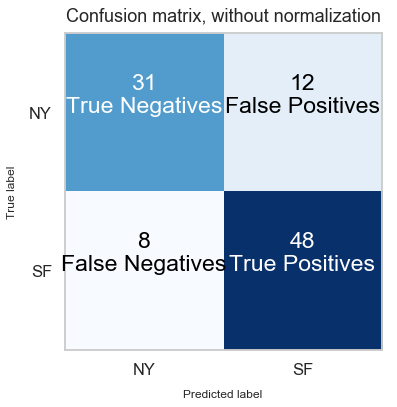

In [52]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    name = None    
    fmt = 'd'
    thresh = cm.max() / 2
    # i and j tell us the coordinates of boxes
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if i == 0 and j == 0:
            name = "True Negatives"
        elif i == 0 and j == 1:
            name = "False Positives"
        elif i == 1 and j == 1:
            name = "True Positives"
        else:
            name = "False Negatives"
        plt.text(j, i, format(cm[i, j], fmt) + "\n" + name, horizontalalignment="center", 
                 fontsize=23, color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', labelpad=12,fontsize=12)
    plt.xlabel('Predicted label', labelpad=12,fontsize=12)
    plt.title(title, y=1.02)
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_predictions);
np.set_printoptions(precision=2);

# Plot non-normalized confusion matrix
plt.figure(figsize=(6, 6))
plt.grid(False)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

Out of 99 predictions in the Confusion matrix above:
<ul>The model predicted 48 Houses in San Francisco, and the houses actually in SF were same. So, a True Positive case.</ul>
<ul>The model predicted 31 houses in New York and the houses actually in New York were same. So, a Negative case.</ul>
<ul>The model predicted 8 houses in New York but they were actually in San Francisco. So, a False Negative case</ul>
<ul>The model predicted 12 houses in San Francisco but they were actually in New York.So, a False Positives case</ul>
<ul>Comment: Our Model is predicting 20 incorrect predictions out of 99 predictions.</ul>

Accuracy: Overall, how often is the classifier correct? 
(TP+TN)/Total = (48+31)/99 = 79.79% 
Misclassification Rate: Overall, how often is it wrong? (FP+FN)/total = (12+8)/99 = 20.20% 
Precision: When it predicts yes, how often is it correct? TP/predicted yes = 48/60 = 80%

Though the accuracy in this model is more than in the previous one with only one feature but the precision rate is less in this model.

Precision for model is:

In [53]:
print("Precision: {0}".format(precision_score(y_test, y_test_predictions)))

Precision: 0.8


Though the accuracy has improved a little to <b>79.9% </b>but precision has fall down to <b>80%</b>
Thus, adding the second feature has not helped out much.

### Adding 3 features using Cross Validation

In [54]:
X_3_columns = X_train[['price_per_sqft', 'elevation','price']]

In [55]:
X_3_test = X_test[['price_per_sqft', 'elevation','price']]

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
def cross_valid(feature_cv):
    model = LogisticRegression()
    scores = cross_val_score(model, feature_cv, y_train, cv=5)
    print(scores.mean())

In [57]:
cross_valid(X_3_columns[['elevation']])

0.8066098669263224


In [58]:
cross_valid(X_3_columns[['price_per_sqft']])

0.7686311262577086


In [59]:
cross_valid(X_3_columns[['price']])

0.6288599480688088


In [66]:
cross_valid(X_3_columns) #taking all 3 features

0.8217405063291139


In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
def cross_valid_test(feature_cv):
    model = LogisticRegression()
    model.fit(X_3_columns,y_train)
    scores = cross_val_score(model, feature_cv, y_test, cv=5)
    print(scores.mean())
    

In [62]:
cross_valid_test(X_3_test[['elevation']])

0.7773182957393484


In [63]:
cross_valid_test(X_3_test[['price_per_sqft']])

0.7491228070175439


In [64]:
cross_valid_test(X_3_test[['price']])

0.5558646616541354


In [67]:
cross_valid_test(X_3_test) #taking all 3 features

0.8397994987468671


As from the validation set, we can see that in case of single feature Elevation performed the best
But overall when we added three features the model has improved by 6%